# 手写数字聚类分析
使用手写数字数据集进行聚类分析研究，同时将结果进行可视化呈现。

注：手写数字特征维度较高，需要进行降维后才能够进行可视化

需要用到主成分分析法（PCA）进行降维，也可以采用其他降维方法，如TSNE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits   # 导入sklearn中的手写数字数据集
from sklearn.decomposition import PCA  # 导入PCA进行降维
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split # 引入拆分数据集方法

digits_data = load_digits()
digits_features = digits_data.data
digits_labels = digits_data.target

print('手写数字数据集的形状为：\n', digits_features.shape)
print('手写数字数据集的特征向量前十条为：\n', digits_features[:10])
print('手写数字数据集的标签前十条为：\n', digits_labels[:10])

手写数字数据集的形状为：
 (1797, 64)
手写数字数据集的特征向量前十条为：
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.

In [2]:
%matplotlib inline

## 可视化数字

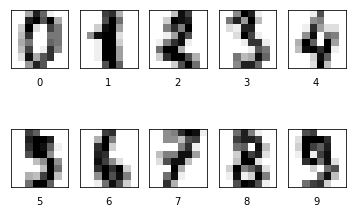

In [3]:
for i in range(1, 11):
    plt.subplot(2, 5, i)     # 划分成2行5列
    plt.imshow(digits_data.data[i - 1].reshape([8, 8]), cmap = plt.cm.gray_r)
    plt.text(3, 10, str(digits_data.target[i - 1])) # 在图片的任意位置添加文字
    plt.xticks([])  # 认为设置坐标轴显示的刻度值
    plt.yticks([])
plt.show()

## 使用主成分分析法进行降维

In [6]:
pca = PCA(n_components = 2)    # 降维为二维
dimension_reduced_digits_features = pca.fit_transform(digits_features)

print('降维后的手写数字向量表示为：\n', dimension_reduced_digits_features[:5])
print('降维后的手写数字向量每个维度所包含的信息量为：\n', pca.explained_variance_ratio_)

降维后的手写数字向量表示为：
 [[ -1.25946581  21.27488271]
 [  7.95761428 -20.76869988]
 [  6.99192107  -9.9559862 ]
 [-15.90610818   3.33246584]
 [ 23.30687296   4.26905836]]
降维后的手写数字向量每个维度所包含的信息量为：
 [0.14890594 0.13618771]


## 聚类分析
使用降维后的特征对手写数字进行聚类分析

In [7]:
from sklearn.cluster import KMeans

n_clusters = 10
cluster = KMeans(n_clusters=n_clusters, random_state=21).fit(dimension_reduced_digits_features)

y_pred = cluster.predict(dimension_reduced_digits_features)

# 输出前五个样本的预测类簇标签
print(y_pred[:5])

[6 0 9 1 5]


In [9]:
centroid = cluster.cluster_centers_  # 质心的数值获取
inertia = cluster.inertia_           # inertia 类内聚合度的一种度量方式

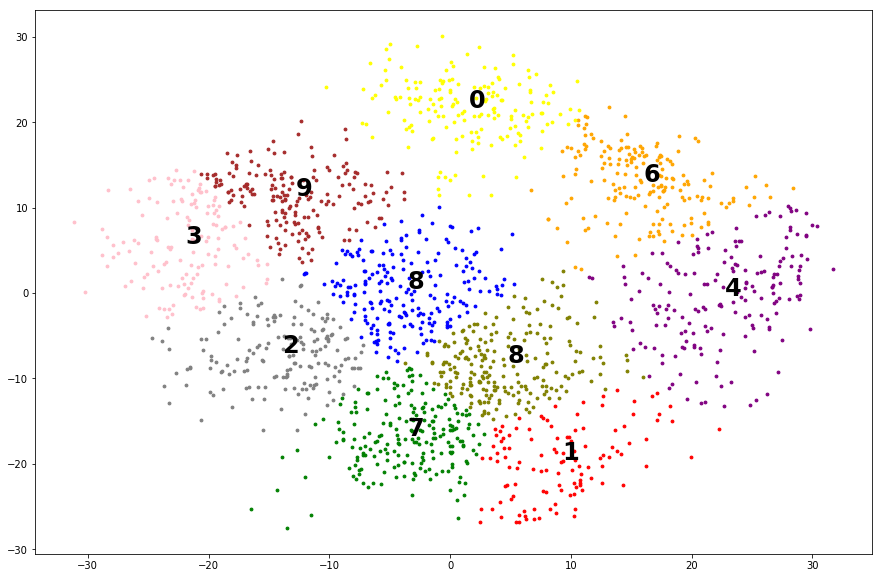

In [11]:
from collections import Counter  # 用于计数

color = ['red', 'pink', 'orange', 'gray', 'blue', 'purple', 'yellow', 'green', 'brown', 'olive']
fig = plt.figure(figsize = (15, 10))
axil = fig.add_subplot(1, 1, 1)
visualization_labels = []

# 以类簇为区别，为不同的聚簇绘制不同颜色的点
for i in range(n_clusters):
    axil.scatter(dimension_reduced_digits_features[y_pred==i, 0],
                dimension_reduced_digits_features[y_pred==i, 1],
                marker = 'o',
                s = 8,
                c = color[i])
    # 将每个类簇中样本的实际标签选出来，选择最高频次的数字标签作为该类簇的标签
    ## 获得特定类簇的数字标签
    tmp_labels = digits_labels[y_pred==i]  
    ## 对标签进行统计
    tmp_collection_labels = Counter(tmp_labels) 
    ## 获得最高频次的两个数
    tmp_target_collection_labels = tmp_collection_labels.most_common(2)
    visualization_labels.append(str(tmp_target_collection_labels[0][0]))
    
# 为不同的聚簇命名
for i in range(len(visualization_labels)):
    ## 这里xy是需要标记的坐标，xytext是对应的标签坐标
    plt.annotate(visualization_labels[i],
                xy = (centroid[i, 0], centroid[i, 1]),
                xytext = (centroid[i, 0] + 0.1, centroid[i, 1] + 0.1),
                fontsize = 24,
                fontweight = 'bold'
                )
plt.show()

# 扩展作业
有兴趣的同学可以研究一下，用降维之前的数据进行聚类，分析每一个类簇的预测类别和实际所属类别之间的关系